# Interpretability 10A: swap

The task has 9 inputs bits $x_1, \cdots, x_9\in\{0,1\}$ and one output bit $y\in \{0,1\}$.

$y = {\rm maj}({\rm maj}(x_1,x_2,x_3), {\rm maj}(x_4,x_5,x_6), {\rm maj}(x_7,x_8,x_9))$

where ${\rm maj}$ outputs 1 and two or three input bits are 1, otherwise outputs 0.

**KAN**

In [1]:
import torch
import numpy as np
from kan import *

seed = 5
torch.manual_seed(seed)
np.random.seed(seed)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)


inputs = []
for i in range(2**9):
    string = "{0:b}".format(i)
    sample = [int(string[i]) for i in range(len(string))]
    sample = (9 - len(sample)) * [0] + sample
    inputs.append(sample)
   
inputs = np.array(inputs).astype(np.float32)
middle = np.array([np.sum(inputs[:,:3], axis=1) > 1.5, np.sum(inputs[:,3:6], axis=1) > 1.5, np.sum(inputs[:,6:9], axis=1) > 1.5]).astype(np.float32)
labels = (np.sum(middle, axis=0) > 1.5).astype(np.float32)[:,None]
inputs = torch.tensor(inputs)
labels = torch.tensor(labels)


dataset = create_dataset_from_data(inputs, labels, device=device)

width = [9, 10, 10, 1]
model = KAN(width=width, seed=seed, noise_scale=1.0, device=device)
depth = len(width) - 1

def train_acc():
    return torch.mean(((model(dataset['train_input']) > 0.5) == dataset['train_label']).float())

def test_acc():
    return torch.mean(((model(dataset['test_input']) > 0.5) == dataset['test_label']).float())


model.fit(dataset, lamb=0.001, lamb_entropy=5., steps=20, stop_grid_update_step=1000, metrics=[train_acc, test_acc], display_metrics=['train_loss', 'train_acc', 'test_acc', 'reg']);

cuda
checkpoint directory created: ./model
saving model version 0.0


 train_loss: 2.40e-02 | train_acc: 1.00e+00 | test_acc: 1.00e+00 | reg: 2.69e+01 |: 100%|█| 20/20 [0

saving model version 0.1


In [2]:
#model.plot()

In [3]:
model.auto_swap()

saving model version 0.2


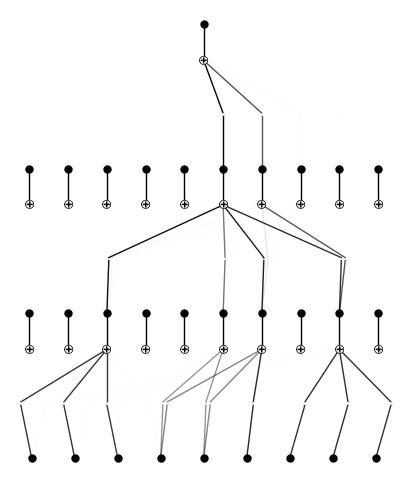

In [4]:
model.plot()

In [5]:
model = model.prune(node_th=5e-2)

saving model version 0.3


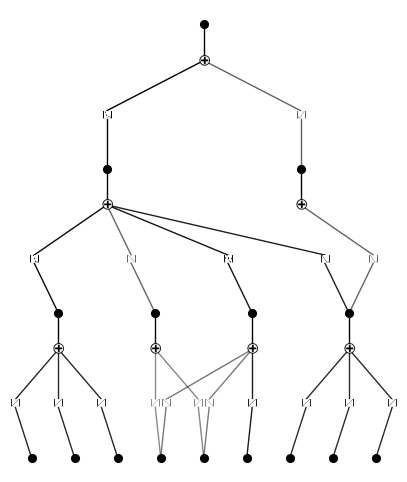

In [6]:
model.plot()

**MLP**

In [7]:
import torch
import numpy as np
from kan import *
from kan.MLP import MLP

seed = 5
torch.manual_seed(seed)
np.random.seed(seed)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

inputs = []
for i in range(2**9):
    string = "{0:b}".format(i)
    sample = [int(string[i]) for i in range(len(string))]
    sample = (9 - len(sample)) * [0] + sample
    inputs.append(sample)
   
inputs = np.array(inputs).astype(np.float32)
middle = np.array([np.sum(inputs[:,:3], axis=1) > 1.5, np.sum(inputs[:,3:6], axis=1) > 1.5, np.sum(inputs[:,6:9], axis=1) > 1.5]).astype(np.float32)
labels = (np.sum(middle, axis=0) > 1.5).astype(np.float32)[:,None]
inputs = torch.tensor(inputs)
labels = torch.tensor(labels)


dataset = create_dataset_from_data(inputs, labels, device=device)

width = [9, 20, 20, 1]
model = MLP(width=width, seed=seed, device=device)
depth = len(width) - 1

def train_acc():
    return torch.mean(((model(dataset['train_input']) > 0.5) == dataset['train_label']).float())

def test_acc():
    return torch.mean(((model(dataset['test_input']) > 0.5) == dataset['test_label']).float())


model.fit(dataset, lamb=0.0001, lamb_entropy=2., steps=1000, reg_metric='w', metrics=[train_acc, test_acc], display_metrics=['train_loss', 'train_acc', 'test_acc', 'reg']);

cuda


 train_loss: 1.28e-02 | train_acc: 1.00e+00 | test_acc: 1.00e+00 | reg: 7.73e+01 |: 100%|█| 1000/100


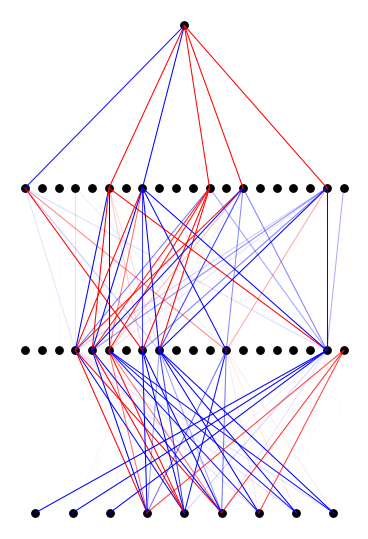

In [8]:
model.plot(scale=1.5)

In [9]:
model.auto_swap()

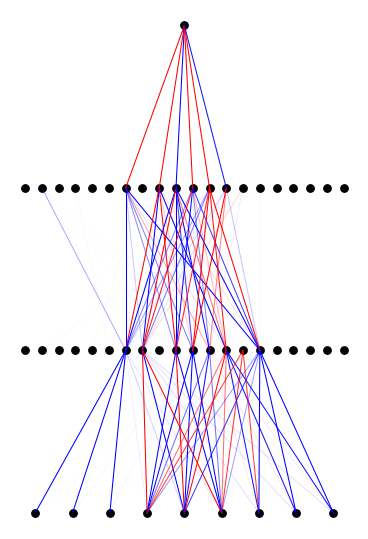

In [10]:
model.plot(scale=1.5)